# 1. import libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

In [3]:
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = 10,5

---
# 2. import dataset

In [4]:
df = pd.read_csv('temp.csv')
df.shape

(522, 10)

---
# 2. RF Model - 1st iteration

In [5]:
y = df['Y']
x = df.drop('Y', axis=1)

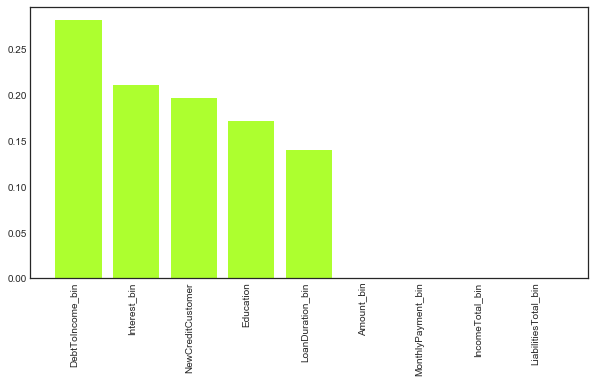

In [6]:
rforest = RandomForestClassifier(max_depth=5, min_samples_leaf=100, n_estimators=1000, random_state = 42)
rforest.fit(x, y)
fimportance = rforest.feature_importances_
rf = pd.DataFrame([x.columns,fimportance]).transpose()
rf.columns = ['variable','importance']
rf = rf.sort_values(by='importance', ascending=False)
plt.bar(rf['variable'],rf['importance'],color='greenyellow')
plt.xticks(rotation=90, ha='right')
plt.show()

In [7]:
model = RandomForestClassifier(max_depth=5, min_samples_leaf=100, n_estimators=1000, random_state = 42)
accuracies = cross_val_score(estimator = model, X= x, y = y, scoring = "roc_auc", cv = 3, n_jobs = -1)
print("AUROC: %0.3f (+/- %0.3f)"  % (accuracies.mean(), accuracies.std() * 2))

AUROC: 0.544 (+/- 0.099)


---
# 4. Drop - 2nd iteration

In [8]:
rf = rf[rf['importance']>0.1]['variable'].to_list()
rf.append('Y')
df = df[rf]
y = df['Y']
x = df.drop('Y', axis=1)

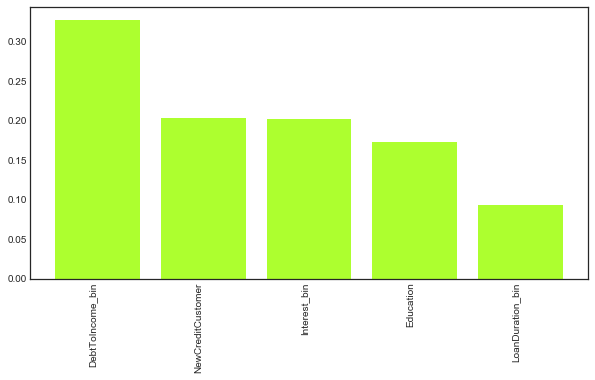

In [9]:
rforest = RandomForestClassifier(max_depth=5, min_samples_leaf=100, n_estimators=1000, random_state = 42)
rforest.fit(x, y)
fimportance = rforest.feature_importances_
rf = pd.DataFrame([x.columns,fimportance]).transpose()
rf.columns = ['variable','importance']
rf = rf.sort_values(by='importance', ascending=False)
plt.bar(rf['variable'],rf['importance'],color='greenyellow')
plt.xticks(rotation=90, ha='right')
plt.show()

In [10]:
model = RandomForestClassifier(max_depth=5, min_samples_leaf=100, n_estimators=1000, random_state = 42)
accuracies = cross_val_score(estimator = model, X= x, y = y, scoring = "roc_auc", cv = 3, n_jobs = -1)
print("AUROC: %0.3f (+/- %0.3f)"  % (accuracies.mean(), accuracies.std() * 2))

AUROC: 0.557 (+/- 0.136)


---
# 5. export dataset

In [11]:
df.to_csv('model.csv', index=False)
df.shape

(522, 6)